### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [99]:
data = pd.read_csv('data/coupons.csv')

In [100]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [101]:
# Check general information, check nulls and duplicates
data.describe()
data.info()
check_Null = data.isnull().sum()
print(check_Null)
check_Duplicates = data.duplicated().sum()
print("No. of duplicates: " + str(check_Duplicates))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [102]:
# Remove duplicates
data = data.drop_duplicates()
# Remove any rows that have null values in the specified columns
data = data.dropna(subset=['Bar'])
data = data.dropna(subset=['CoffeeHouse'])
data = data.dropna(subset=['CarryAway'])
data = data.dropna(subset=['RestaurantLessThan20'])
data = data.dropna(subset=['Restaurant20To50'])
# Remove the 'car' column as it is almost all empty
data = data.drop(columns='car', axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [103]:
# Get number of rows that accepted coupon
accepted_coupon = data.query("Y == 1")['Y'].count()
# Get accepted percentage: No. of Accepted / total entries (12007) * 100
proportion_accept_coupon = accepted_coupon / 12007 * 100
print("Proportion of those that accept the coupon: " + str(proportion_accept_coupon))


Proportion of those that accept the coupon: 56.84184225868244


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: count, dtype: int64


<Axes: title={'center': 'Coupon Type Quantities'}, xlabel='Type of Coupon', ylabel='Quantity'>

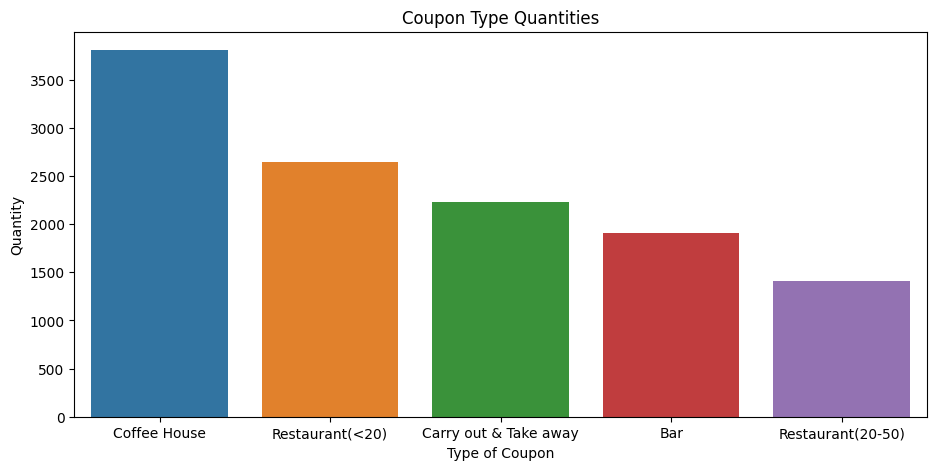

In [104]:
# Settings for better readability
plt.figure(figsize=(11, 5))
plt.title('Coupon Type Quantities')
plt.xlabel('Type of Coupon')
plt.ylabel('Quantity')
# Get value_counts of coupon column to get the data
coupon_value_counts = data['coupon'].value_counts()
print(coupon_value_counts)
# Seaborn barplot
sns.barplot(x = coupon_value_counts.index, y = coupon_value_counts.values, hue = coupon_value_counts.index)

6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Temperature Distribution'}, xlabel='Temperature Measurement', ylabel='Temperature Frequency'>

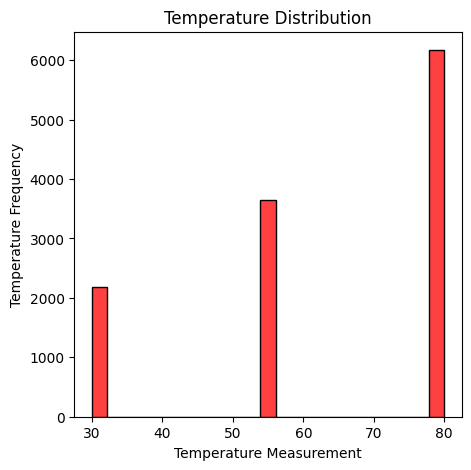

In [105]:
# Settings for better readability
plt.figure(figsize=(5, 5))
plt.title('Temperature Distribution')
plt.xlabel('Temperature Measurement')
plt.ylabel('Temperature Frequency')
# Seaborn histogram for the temperature column
sns.histplot(data = data[['temperature']], x = 'temperature', color = 'red')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [106]:
# Create DataFrame that only contains bar coupons
bar_coupons = data[data['coupon'] == "Bar"]
# Observe the data
bar_coupons.info()
bar_coupons.describe()
bar_coupons.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null   obj

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [107]:
# Get number of bar coupons that were accepted
coupon_accepted_total = bar_coupons.query("Y == 1")["Y"].count()
# Get accepted percentage: No. of Accepted / total entries (1906) * 100
proportion_accept_coupon = coupon_accepted_total / 1906 * 100
print("Bar coupon acceptance rate: " + str(proportion_accept_coupon))

Bar coupon acceptance rate: 41.185729275970616


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [108]:
three_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['1~3', 'never', 'less1'])]
three_or_fewer_accepted = three_or_fewer.query('Y == 1')["Y"].count()
three_or_fewer.info()
three_or_fewer_acceptance_rate = three_or_fewer_accepted / 1713 * 100

more = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
more_accepted = more.query('Y == 1')["Y"].count()
more.info()
more_acceptance_rate = more_accepted / 193 * 100
print("Acceptance Rate for those who went to a bar 3 or fewer times a month: " + str(three_or_fewer_acceptance_rate))
print("Acceptance Rate for those who went to a bar more than 3 times a month: " + str(more_acceptance_rate))


<class 'pandas.core.frame.DataFrame'>
Index: 1713 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1713 non-null   object
 1   passanger             1713 non-null   object
 2   weather               1713 non-null   object
 3   temperature           1713 non-null   int64 
 4   time                  1713 non-null   object
 5   coupon                1713 non-null   object
 6   expiration            1713 non-null   object
 7   gender                1713 non-null   object
 8   age                   1713 non-null   object
 9   maritalStatus         1713 non-null   object
 10  has_children          1713 non-null   int64 
 11  education             1713 non-null   object
 12  occupation            1713 non-null   object
 13  income                1713 non-null   object
 14  Bar                   1713 non-null   object
 15  CoffeeHouse           1713 non-null   obj

The Acceptance Rate for those who went to a bar 3 or fewer times a month is 37%.

The Acceptance Rate for those who went to a bar more than 3 times a month is 76%.

Those that receive a bar coupon while driving are more likely to accept it if they regularly go to bars more than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [109]:
more_than_once = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > '25')]
more_than_once_accepted = more_than_once.query('Y == 1')["Y"].count()
more_than_once.info()
more_than_once_acceptance_rate = more_than_once_accepted / 413 * 100

everyone_else = bar_coupons[(bar_coupons['Bar'].isin(['less1', 'never'])) | (bar_coupons['age'] <= '25')]
everyone_else_accepted = everyone_else.query('Y == 1')["Y"].count()
everyone_else.info()
everyone_else_acceptance_rate = everyone_else_accepted / 1493 * 100
print("Acceptance Rate for those over 25 who go to a bar more than once a month: " + str(more_than_once_acceptance_rate))
print("Acceptance Rate for everyone else: " + str(everyone_else_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 112 to 12500
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           413 non-null    object
 1   passanger             413 non-null    object
 2   weather               413 non-null    object
 3   temperature           413 non-null    int64 
 4   time                  413 non-null    object
 5   coupon                413 non-null    object
 6   expiration            413 non-null    object
 7   gender                413 non-null    object
 8   age                   413 non-null    object
 9   maritalStatus         413 non-null    object
 10  has_children          413 non-null    int64 
 11  education             413 non-null    object
 12  occupation            413 non-null    object
 13  income                413 non-null    object
 14  Bar                   413 non-null    object
 15  CoffeeHouse           413 non-null    obj

Acceptance Rate for those over 25 who go to a bar more than once a month is 68%.

Acceptance Rate for everyone else is 34%.

Those that receive a bar coupon while driving are more likely to accept it if they regularly go to bars more than 1 time a month and older than 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [110]:
more_than_once = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
 (bar_coupons['passanger'].isin(['Friend(s)', 'Partner', 'Alone'])) &
 (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]
more_than_once_accepted = more_than_once.query('Y == 1')["Y"].count()
more_than_once.info()
more_than_once_acceptance_rate = more_than_once_accepted / 530 * 100

everyone_else = bar_coupons[(bar_coupons['Bar'].isin(['less1', 'never'])) |
 (bar_coupons['passanger'] == 'Kid(s)') |
 (bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]
everyone_else_accepted = everyone_else.query('Y == 1')["Y"].count()
everyone_else.info()
everyone_else_acceptance_rate = everyone_else_accepted / 1376 * 100
print("Acceptance Rate for those who go to a bar more than once a month, no kid passengers, and not in farming, fishing, or forestry: " + str(more_than_once_acceptance_rate))
print("Acceptance Rate for everyone else: " + str(everyone_else_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 90 to 12544
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           530 non-null    object
 1   passanger             530 non-null    object
 2   weather               530 non-null    object
 3   temperature           530 non-null    int64 
 4   time                  530 non-null    object
 5   coupon                530 non-null    object
 6   expiration            530 non-null    object
 7   gender                530 non-null    object
 8   age                   530 non-null    object
 9   maritalStatus         530 non-null    object
 10  has_children          530 non-null    int64 
 11  education             530 non-null    object
 12  occupation            530 non-null    object
 13  income                530 non-null    object
 14  Bar                   530 non-null    object
 15  CoffeeHouse           530 non-null    obje

Acceptance Rate for those who go to a bar more than once a month, no kid passengers, and not in farming, fishing, or forestry: 71%.

Acceptance Rate for everyone else: 30%.

Those that receive a bar coupon while driving are more likely to accept it if they regularly go to bars more than 1 time a month, no passengers that are kids, and not in the farming, fishing, or forestry industries.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [111]:
drivers1 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
 (bar_coupons['passanger'].isin(['Friend(s)', 'Partner', 'Alone'])) &
 (bar_coupons['maritalStatus'] != 'Widowed')]
drivers1_accepted = drivers1.query('Y == 1')["Y"].count()
drivers1.info()
drivers1_acceptance_rate = drivers1_accepted / 530 * 100

drivers2 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
 (bar_coupons['age'] < '30')]
drivers2_accepted = drivers2.query('Y == 1')["Y"].count()
drivers2.info()
drivers2_acceptance_rate = drivers2_accepted / 318 * 100

drivers3 = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
 (bar_coupons['income'].isin(['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']))]
drivers3_accepted = drivers3.query('Y == 1')["Y"].count()
drivers3.info()
drivers3_acceptance_rate = drivers3_accepted / 333 * 100

print("Acceptance Rate - Goes to bars more than once a month, no kid passengers, not widowed: " + str(drivers1_acceptance_rate))
print("Acceptance Rate - Goes to bars more than once a month, under 30 years old: " + str(drivers2_acceptance_rate))
print("Acceptance Rate - Goes to cheap restaurants more than 4 times a month, income less than 50k: " + str(drivers3_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 90 to 12544
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           530 non-null    object
 1   passanger             530 non-null    object
 2   weather               530 non-null    object
 3   temperature           530 non-null    int64 
 4   time                  530 non-null    object
 5   coupon                530 non-null    object
 6   expiration            530 non-null    object
 7   gender                530 non-null    object
 8   age                   530 non-null    object
 9   maritalStatus         530 non-null    object
 10  has_children          530 non-null    int64 
 11  education             530 non-null    object
 12  occupation            530 non-null    object
 13  income                530 non-null    object
 14  Bar                   530 non-null    object
 15  CoffeeHouse           530 non-null    obje

Acceptance Rate - Goes to bars more than once a month, no kid passengers, not widowed: 71%

Acceptance Rate - Goes to bars more than once a month, under 30 years old: 73%

Acceptance Rate - Goes to cheap restaurants more than 4 times a month, income less than 50k: 46%

Those that receive a bar coupon while driving are more likely to accept it if they regularly go to bars more than 1 time a month and are under 30 years old. Having no kids in the car and not being a widow also contributes to accepting the coupon.

There is a less than 50% chance someone who eats at cheap restaurants more than 4 times a month and makes less than 50k in income.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, it seems that the drivers who receive the bar coupons are more likely to accept it if:

*   They regularly go to bars once or multiple times a month
*   They are younger in age around the mid to late-twenties
*   They are not widowed and do not have kids in the car at the time of receiving the coupon
*   They are not in the farming, fishing, or forestry industries

Those who received the bar coupon who often eat at cheap restaurants and make less than $50k in income have a 45% of accepting the coupon, just slightly unlikely to accept the coupon. This may need to be observed other with other categories. For example, the time of day could be observed to give data on whether or not it affects the decision to accept or reject the coupon under these circumstances.

One recommendation of another observation would be the destination or perhaps another column is needed in the dataset describing opinion on drinking alcohol. The Bar category is interesting as the person is currently driving but the thought of stopping by a bar to drink alcohol may affect their ability to drive afterwards and thus may influence their decision on accepting the coupon. The destination may help to determine whether they need to arrive at their destination urgently or not, in which case they can spend time away from driving before they are comfortable and sober enough to continut their journey.

Overall, there is a 41% acceptance rate to accept a bar coupon while driving.





### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


# Takeout Coupon
For my independent investigation, I will be observing the Takeout coupon group and will try to determine the characteristics of passengers who accept these coupons.

In [120]:
# Create DataFrame that only contains Takeout coupons
takeout_coupons = data[data['coupon'] == "Carry out & Take away"]
# Observe the data
takeout_coupons.info()
takeout_coupons.describe()
takeout_coupons.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 25 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2233 non-null   object
 1   passanger             2233 non-null   object
 2   weather               2233 non-null   object
 3   temperature           2233 non-null   int64 
 4   time                  2233 non-null   object
 5   coupon                2233 non-null   object
 6   expiration            2233 non-null   object
 7   gender                2233 non-null   object
 8   age                   2233 non-null   object
 9   maritalStatus         2233 non-null   object
 10  has_children          2233 non-null   int64 
 11  education             2233 non-null   object
 12  occupation            2233 non-null   object
 13  income                2233 non-null   object
 14  Bar                   2233 non-null   object
 15  CoffeeHouse           2233 non-null   obj

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


## Acceptance rate of takeout coupons

In [113]:
# Get number of takeout coupons that were accepted
coupon_accepted_total = takeout_coupons.query("Y == 1")["Y"].count()
# Get accepted percentage: No. of Accepted / total entries (2233) * 100
proportion_accept_coupon = coupon_accepted_total / 2233 * 100
print("Takeout coupon acceptance rate: " + str(proportion_accept_coupon))

Takeout coupon acceptance rate: 73.5781459919391


There is a 74% chance that drivers who receive a takeout coupon will accept it

## Acceptance rate depending on destination

In [114]:
# Acceptance rate of people driving to work
destination1 = takeout_coupons[(takeout_coupons['destination'] == 'Work')]
destination1_accepted = destination1.query('Y == 1')["Y"].count()
destination1.info()
destination1_acceptance_rate = destination1_accepted / 688 * 100

# Acceptance rate of people driving to no urgent place
destination2 = takeout_coupons[(takeout_coupons['destination'] == 'No Urgent Place')]
destination2_accepted = destination2.query('Y == 1')["Y"].count()
destination2.info()
destination2_acceptance_rate = destination2_accepted / 927 * 100

# Acceptance rate of people driving to home
destination3 = takeout_coupons[(takeout_coupons['destination'] == 'Home')]
destination3_accepted = destination3.query('Y == 1')["Y"].count()
destination3.info()
destination3_acceptance_rate = destination3_accepted / 618 * 100

print("Acceptance rate - driving to work: " + str(destination1_acceptance_rate))
print("Acceptance rate - driving to no urgent place: " + str(destination2_acceptance_rate))
print("Acceptance rate - driving to no home: " + str(destination3_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 41 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           688 non-null    object
 1   passanger             688 non-null    object
 2   weather               688 non-null    object
 3   temperature           688 non-null    int64 
 4   time                  688 non-null    object
 5   coupon                688 non-null    object
 6   expiration            688 non-null    object
 7   gender                688 non-null    object
 8   age                   688 non-null    object
 9   maritalStatus         688 non-null    object
 10  has_children          688 non-null    int64 
 11  education             688 non-null    object
 12  occupation            688 non-null    object
 13  income                688 non-null    object
 14  Bar                   688 non-null    object
 15  CoffeeHouse           688 non-null    obje

Those driving to work have a 65% of accepting a takeout coupon.

Those driving to no urgent place have a 76% of accepting a takeout coupon.

Those driving to home have a 79% of accepting a takeout coupon.

## Acceptance rate based on income

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 47 to 12630
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1181 non-null   object
 1   passanger             1181 non-null   object
 2   weather               1181 non-null   object
 3   temperature           1181 non-null   int64 
 4   time                  1181 non-null   object
 5   coupon                1181 non-null   object
 6   expiration            1181 non-null   object
 7   gender                1181 non-null   object
 8   age                   1181 non-null   object
 9   maritalStatus         1181 non-null   object
 10  has_children          1181 non-null   int64 
 11  education             1181 non-null   object
 12  occupation            1181 non-null   object
 13  income                1181 non-null   object
 14  Bar                   1181 non-null   object
 15  CoffeeHouse           1181 non-null   obj

<Axes: title={'center': 'Coupon Acceptance Frequency Based on Income'}, xlabel='Income', ylabel='Coupon Acceptance Frequency'>

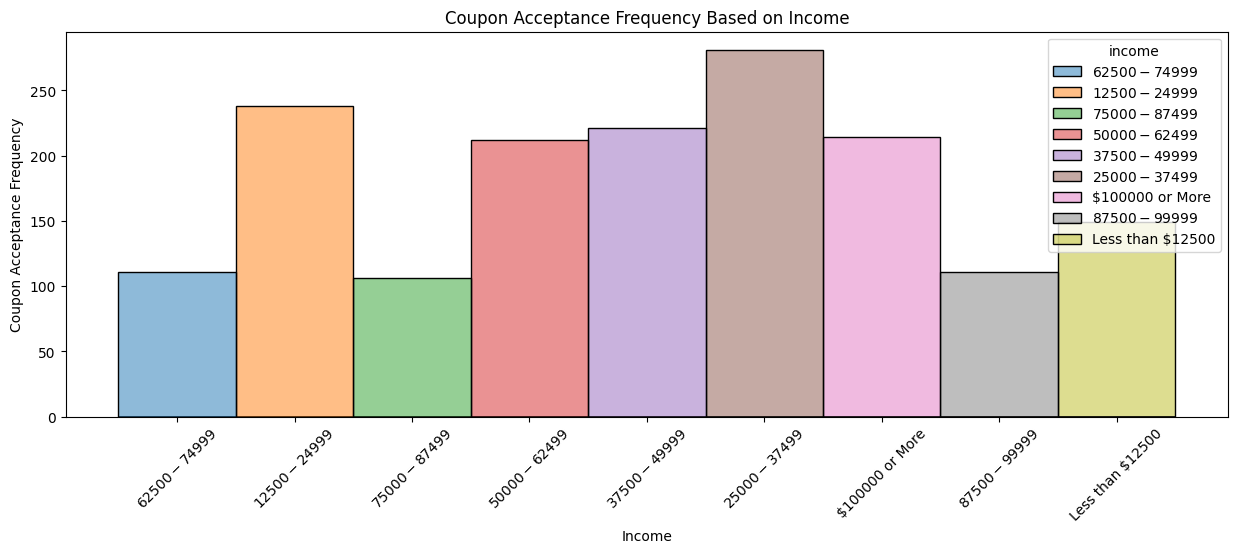

In [115]:
# Acceptance rate of people making less than $50k
income_less50 = takeout_coupons[takeout_coupons['income'].isin(['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500'])]
income_less50_accepted = income_less50.query('Y == 1')["Y"].count()
income_less50.info()
income_less50_acceptance_rate = income_less50_accepted / 1181 * 100
print("Acceptance rate - income less than 50k: " + str(income_less50_acceptance_rate))

# Histogram for those that accepted coupon based on age
# Settings for better readability
plt.figure(figsize=(15, 5))
plt.title('Coupon Acceptance Frequency Based on Income')
plt.xlabel('Income')
plt.ylabel('Coupon Acceptance Frequency')
plt.xticks(rotation = 45)
sns.histplot(data = takeout_coupons[takeout_coupons['Y'] == 1], x = 'income', hue = 'income')

## Comparison of mixture of conditions

1. Acceptance rate of people that takeout more than once a month, kid passengers in the car, and married.

2. Acceptance rate of people that takeout rarely, older than 30, and female.

3. Acceptance rate of people that eat at cheap restaurants often, unemployed, stduent, or works in food prepraration & serving related industries.

In [116]:
# Acceptance rate of people that takeout more than once a month, kids in the car, married
carry_away1 = takeout_coupons[(takeout_coupons['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
 (takeout_coupons['passanger'] == 'Kid(s)') &
 (takeout_coupons['maritalStatus'] == 'Married partner')]
carry_away1_accepted = carry_away1.query('Y == 1')["Y"].count()
carry_away1.info()
carry_away1_acceptance_rate = carry_away1_accepted / 97 * 100

# Acceptance rate of people that takeout rarely, older than 30, Female
carry_away2 = takeout_coupons[(takeout_coupons['CarryAway'].isin(['less1', 'never'])) &
 (takeout_coupons['age'] > '30') &
 (takeout_coupons['gender'] == 'Female')]
carry_away2_accepted = carry_away2.query('Y == 1')["Y"].count()
carry_away2.info()
carry_away2_acceptance_rate = carry_away2_accepted / 147 * 100

# Acceptance rate of people that eat at cheap restaurants often, unemployed, student, food service
carry_away3 = takeout_coupons[(takeout_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
 (takeout_coupons['occupation'].isin(['Unemployed', 'Student', 'Food Preparation & Serving Related']))]
carry_away3_accepted = carry_away3.query('Y == 1')["Y"].count()
carry_away3.info()
carry_away3_acceptance_rate = carry_away3_accepted / 253 * 100

print("Acceptance Rate - takeout often, kids in the car, married: " + str(carry_away1_acceptance_rate))
print("Acceptance Rate - older than 30, Female: " + str(carry_away2_acceptance_rate))
print("Acceptance Rate - goes to cheap restaurants often, is unemployed student, or in food service: " + str(carry_away3_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 74 to 10673
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           97 non-null     object
 1   passanger             97 non-null     object
 2   weather               97 non-null     object
 3   temperature           97 non-null     int64 
 4   time                  97 non-null     object
 5   coupon                97 non-null     object
 6   expiration            97 non-null     object
 7   gender                97 non-null     object
 8   age                   97 non-null     object
 9   maritalStatus         97 non-null     object
 10  has_children          97 non-null     int64 
 11  education             97 non-null     object
 12  occupation            97 non-null     object
 13  income                97 non-null     object
 14  Bar                   97 non-null     object
 15  CoffeeHouse           97 non-null     objec

Acceptance Rate - takeout often, kids in the car, married: 71%

Acceptance Rate - older than 30, Female: 62%

Acceptance Rate - goes to cheap restaurants often, is unemployed student, or in food service: 71%

## Acceptance rate of people that takeout more than once a month, male, and single

In [117]:
# Acceptance rate for people that takeout more than once a month, male, single
single_male = takeout_coupons[(takeout_coupons['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
 (takeout_coupons['gender'] == 'Male') &
 (takeout_coupons['maritalStatus'] == 'Single')]
single_male_accepted = single_male.query('Y == 1')["Y"].count()
single_male.info()
single_meal_acceptance_rate = single_male_accepted / 430 * 100

# Acceptance rate for everyone else
everyone_else = takeout_coupons[(takeout_coupons['CarryAway'].isin(['less1', 'never'])) |
 (takeout_coupons['gender'] == 'Female') |
 (takeout_coupons['maritalStatus'] != 'Single')]
everyone_else_accepted = everyone_else.query('Y == 1')["Y"].count()
everyone_else.info()
everyone_else_acceptance_rate = everyone_else_accepted / 1803 * 100

print("Acceptance Rate - Male and Single " + str(single_meal_acceptance_rate))
print("Acceptance Rate - Everyone else " + str(everyone_else_acceptance_rate))

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 25 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           430 non-null    object
 1   passanger             430 non-null    object
 2   weather               430 non-null    object
 3   temperature           430 non-null    int64 
 4   time                  430 non-null    object
 5   coupon                430 non-null    object
 6   expiration            430 non-null    object
 7   gender                430 non-null    object
 8   age                   430 non-null    object
 9   maritalStatus         430 non-null    object
 10  has_children          430 non-null    int64 
 11  education             430 non-null    object
 12  occupation            430 non-null    object
 13  income                430 non-null    object
 14  Bar                   430 non-null    object
 15  CoffeeHouse           430 non-null    obje

Acceptance Rate - Male and Single 76%

Acceptance Rate - Everyone else 73%

## Histogram of coupon acceptance based on weather conditions

<Axes: title={'center': 'Coupon Acceptance Frequency Based on Weather Type'}, xlabel='Weather Type', ylabel='Coupon Acceptance Frequency'>

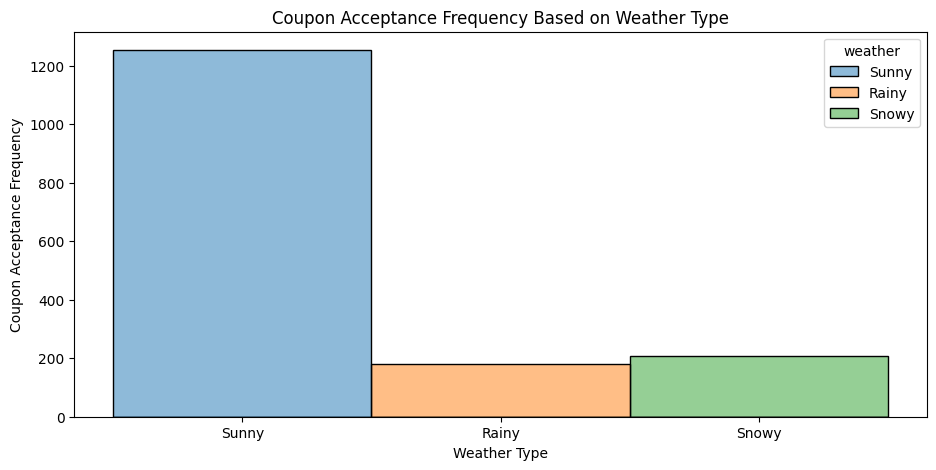

In [118]:
# Histogram for those that accepted coupon based on weather
# Settings for better readability
plt.figure(figsize=(11, 5))
plt.title('Coupon Acceptance Frequency Based on Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Coupon Acceptance Frequency')
sns.histplot(data = takeout_coupons[takeout_coupons['Y'] == 1], x = 'weather', hue = 'weather')

## Histogram of coupon acceptance based on age

<Axes: title={'center': 'Coupon Acceptance Frequency Based on Age'}, xlabel='Age', ylabel='Coupon Acceptance Frequency'>

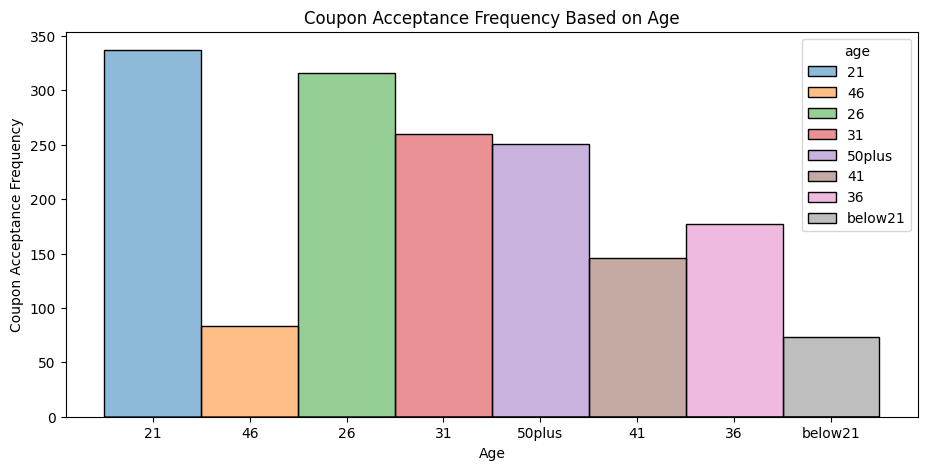

In [119]:
# Histogram for those that accepted coupon based on age
# Settings for better readability
plt.figure(figsize=(11, 5))
plt.title('Coupon Acceptance Frequency Based on Age')
plt.xlabel('Age')
plt.ylabel('Coupon Acceptance Frequency')
sns.histplot(data = takeout_coupons[takeout_coupons['Y'] == 1], x = 'age', hue = 'age')

# **Findings**

For this independent investigation, I am observing the characteristics of those who accept Takeout coupons.

### **Destination**

People driving home are the most likely to accept a coupon for a takeout restaurant at 79%. This makes sense as buying takeout food implies the person will not eat in that immediate area and since they are already driving home, they can pickup food on the way.

Those driving to no urgent place are only a little less likely at 76%.

People driving to work are the least likely at 65%. This may be due to the fact that they do not want to be late to work by taking a detour.

### **Income**
People making less than 50k annually in income are more likely to accept a coupon for takeout, with those making $25000 - 37499 being the most common people accepting the coupon, as seen in the visualization below. This may be due to takeout food generally being cheaper.

One interesting observation is that those who make between 60k and 100k are among the least likely to accept a takeout coupon. However, those making 100k or more are among the most likely to accept the coupon.

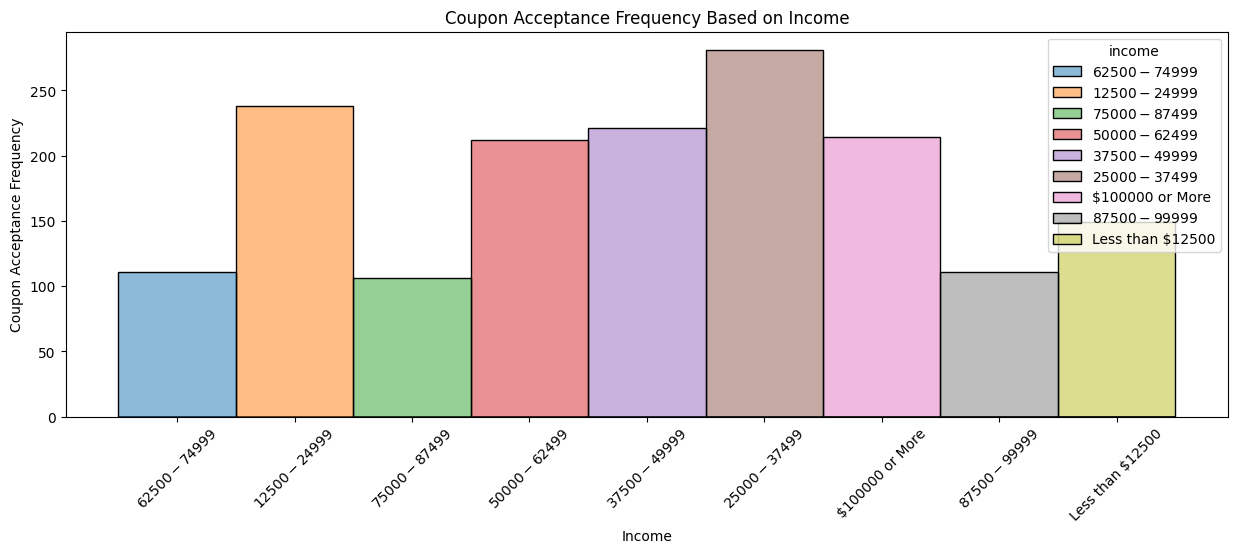

## **Combination of Scenarios**

### **Takeout regular, kids in the car, married**

Additionally, those who order takeout often, such as more than once a month, have kids with them at the time of driving, and are married are more likely to accept the carryout coupon.

Logically, for those that order takout often, it would be in their best interest to accept the coupon.

Also, with a spouse and kids, it would seem this motivates acceptance of the coupon as there are people that the driver is responsible for making sure they have their meals.

### **Females older than 30**

Women older than 30 have a 61% of accepting a takeout coupon while driving. This is not a super strong indication that women older than 30 are likely to accept the coupon. Perhaps another metric can be incorporated such as income, age, and weather.

### **Regular of cheap restaurants, unemployed student, works in food service**

People who eat at cheap restaurants often, is an unemployed student, and works in food service have a 71% chance of accepting a takeout coupon. This may be due to takeout style food generally being on the cheaper end, catering towards people who prefer eating at cheaper restaurants.

### **Male and Single**

People who are male and single are around just as likely to accept the coupon than anyone else at a rate of 75%. Other people have an acceptance rate of 73%. Thus, there is no strong determination of acceptance based on the combination of gender and marital status.

## **Weather**

If the person who received the coupon is driving in sunny weather, they are considerably more likely to accept the coupon based on the high frequency of acceptance in the visualization below.

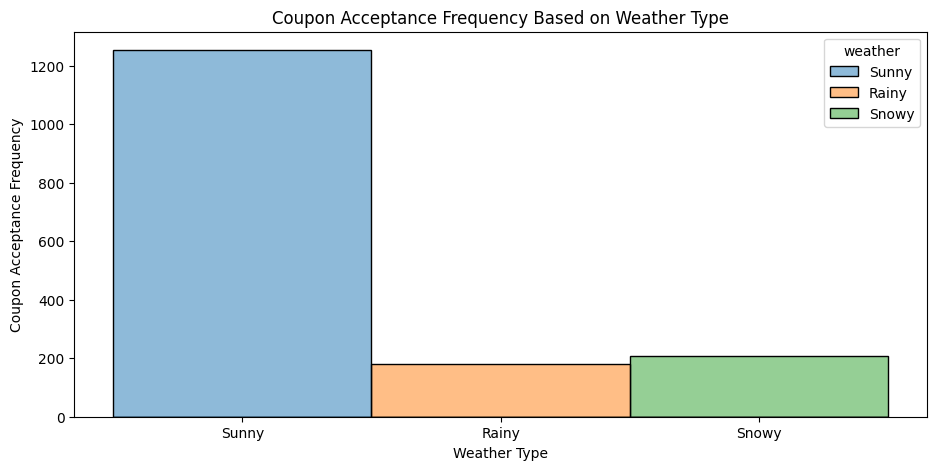

This may be because rainy and snowy weather motivate people to get to their destination as soon as possible and do not want to take detours which will prolong the amount of time they need to drive in bad weather.

## **Age**

In terms of age, people in their early to mid-twenties are the most common demographic likely to accept a coupon for takeout food, see the histogram below:

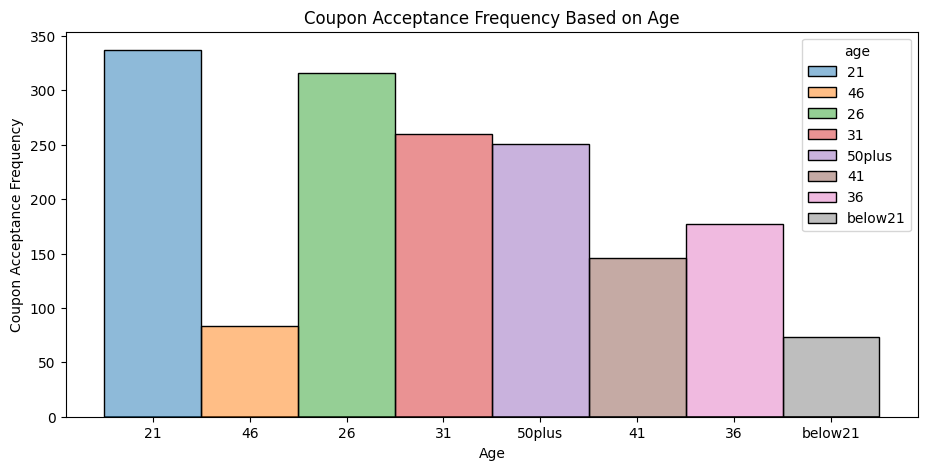

Drivers in their 40's seem to be the most likely to reject the coupon but interestingly, those in their 50's seem to gravitate towards accepting the coupon.

The acceptance rate of those under 21 is very low, which may be due to the fact that a majority of these individuals may still be teenagers or even younger and are less likely to have their license to drive.

## **Next Steps**

In terms of next steps, advertisers and businesses can utilize these observations to curate better content of the coupon and choose the optimal conditions to send these coupons to drivers.

For instance, it has been observed that people in their 20's are more likely to accept a coupon while driving. To get more acceptance of the coupons, the content of the coupon message itself may contain content more suitable for younger people to get their attention such as memes, popular slang, or collaborations with public figures that are well known to younger people.


Another use case can be determining the right time interval to send the coupons out. My observations have shown that those driving home are more likely to accept the coupon than those driving to work. On average, people drive home typically in the late afternoon to evening hours after they are done at work. This could indicate a prime time to send out these coupons to drivers.

The observation of weather also gives a very strong relationship between sunny weather and accepting the takeout coupon. Steps to improve the coupon sendout system to be dynamic according to the weather can be explored to optimize the chances of coupon acceptance.

## **Reccomendations**

There are a few reccomendations to flesh out this dataset and in turn leading to more accurate analysis of coupon acceptance characteristics.

One column that could be added for data collection are different distance ranges from the car to the establishment the coupon is involved with such as 0-5 miles, 5-10 miles, 50+ miles, etc.

This data can indicate how far people might be willing to drive to redeem their coupon.

Other more granular categories can be personal habits such as whether or not someone is vegetarian or does not drink, etc.
Additionally, the coupon type can be fleshed out to be more specific whether or not a restaurant specializes in meat menu items or vegetarian items. We currently are only observing restaurants in terms of price, but the actual themes and food that the restaurants are associated with are not clearly defined.

For the coffee house and bar categories, data observing if the driver likes or is opposed to caffeine or alcohol can be collected as well. As these establishments are logically known to specialize in serving drinks with these stimulants, we can analyze if they are ok with these and whether or not they still chose to accept the coupon to bars or cafes with this knowledge.
